# Boston Housing Price 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import stats  
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

## DATA
The modified Boston housing dataset consists of 489 data points, with each datapoint having 3 features. This dataset is a modified version of the Boston Housing dataset found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing).

**Features**
1. `RM`: average number of rooms per dwelling
2. `LSTAT`: percentage of population considered lower status
3. `PTRATIO`: pupil-teacher ratio by town

**Target Variable**
4. `MEDV`: median value of owner-occupied homes


In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.sample(10)

RM  LSTAT  PTRATIO      MEDV
291  6.495   8.67     16.1  554400.0
413  6.348  17.64     20.2  304500.0
86   6.015  12.86     18.5  472500.0
113  6.092  17.09     17.8  392700.0
398  6.434  29.05     20.2  151200.0
117  6.021  10.30     17.8  403200.0
353  3.561   7.12     20.2  577500.0
319  6.144   9.09     16.9  415800.0
391  5.617  26.40     20.2  361200.0
31   6.072  13.04     21.0  304500.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


#### There is no missing values, all data type is float which is good. Don't need to convert data type

In [5]:
df.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

## Take a look at the distribution of the features

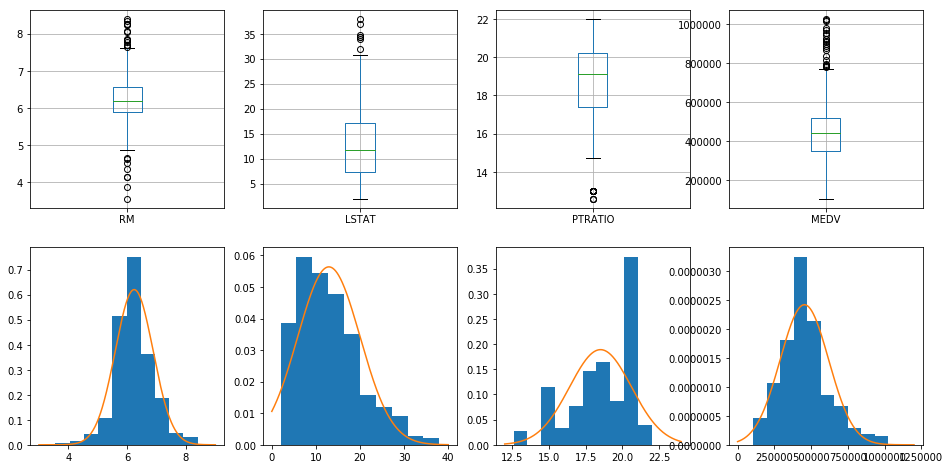

In [6]:
plt.figure(figsize=(16,8))
for i in range(4):
    ax_1_i=plt.subplot(2,4,i+1)
    df.iloc[:,i].to_frame().boxplot()
    ax_2_i=plt.subplot(2,4,i+5)
    plt.hist(x=df.iloc[:,i], density=True)
    xt = plt.xticks()[0]  
    xmin, xmax = min(xt), max(xt)  
    lnspc = np.linspace(xmin, xmax, len(df.iloc[:,i]))

    # lets try the normal distribution first
    m, s = stats.norm.fit(df.iloc[:,i]) # get mean and standard deviation  
    pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
    plt.plot(lnspc, pdf_g, label="Norm")

plt.show()

#### The 3 features and 1 target variables seem to follow a normal distribution with its bell shape histogram. However:
 - LSTAT is quite skewed to the left

## Study the correlation between features

In [7]:
df.corr()

RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000

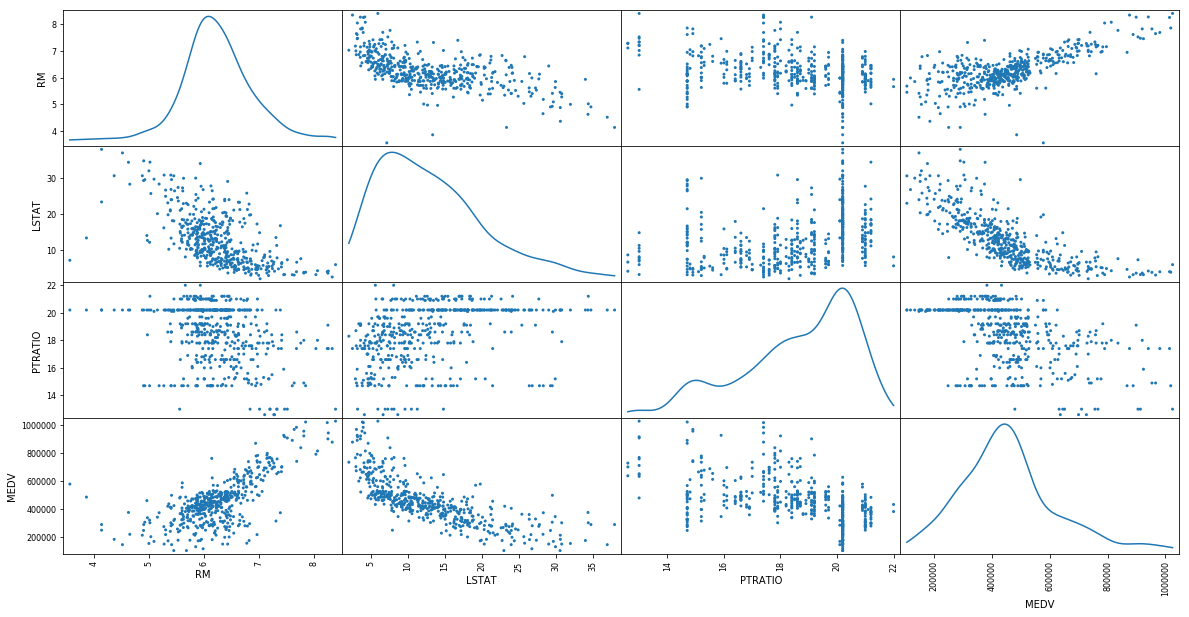

In [8]:
pd.plotting.scatter_matrix(df, alpha=1,figsize = (20,10), diagonal = 'kde')
plt.show()

#### Comments:
1. RM strongly and positively correlated with MEDV -> the more room a house has, the more values it gains
2. LSTAT strongly and negatively correlated with MEDV, more low-status population around a house, the less values it gains
3. PTRATIO show a week and  negative correlatetion with MEDV, more pupil by teacher -> not enough teacher in the neighborhood-> the less values a house gains
4. We can see that RM and LSTAT has a quite strong and negative correlation-> the more average room per house, the small low-status population. We can see it as : in a poor neighborhood, houses don't have many rooms. This could be a potential cause for collinearity but by common sense, low status population brings many other problems, not just less room in a house. And the other way around, houses have less room doesn't always mean that they are in a poor neighborhoods. That's the reason we'll keep both two feature.

## Machine learning

### Full features

In [9]:
features = ["RM","LSTAT","PTRATIO"]

#### Prepare data to train the model

In [10]:
X = df[features].values
Y = df['MEDV'].values

#### Standardizing values of the features

In [11]:
from sklearn import preprocessing
ss_X = preprocessing.StandardScaler().fit(X)
X = ss_X.transform(X)

#### Split train and test set with test size of 10%

In [12]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=74)

In [13]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train) #r2 score of the train data set

0.7258030891151538

In [14]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

453630.35134814476
[ 54643.14163879 -78194.00204884 -40212.4851081 ]


#### Evaluate the model with the test data set

In [15]:
from sklearn import metrics
Y_pred = lin_reg.predict(X_test)
metrics.r2_score(Y_test, Y_pred) 

0.6367937888730998

### Using cross validation to train and evaluate the model on the whole data set

In [16]:
cvs = model_selection.cross_val_score

In [17]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
score = cvs(lin_reg, X, Y, cv=10, scoring='r2')

In [18]:
print('List of r2 score',score)
print()
print('Mean of scores', score.mean())

List of r2 score [ 0.77718326  0.67312458  0.57218124  0.55885698  0.5319267   0.55302261
  0.35466867 -0.48591149 -1.47799344  0.4972724 ]

Mean of scores 0.2554331514988494


### Using only 2 features that is most correlated with our value

In [19]:
features = ["LSTAT","PTRATIO"]
X = df[features].values
Y = df['MEDV'].values
ss_X = preprocessing.StandardScaler().fit(X)
X = ss_X.transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=74)

In [20]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train) #r2 score

0.6570125422745068

In [21]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

453437.6876487927
[-109572.28242166  -45610.67348271]


In [22]:
Y_pred = lin_reg.predict(X_test)
metrics.r2_score(Y_test, Y_pred)

0.5536547481825276

In [23]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
score = cvs(lin_reg, X, Y, cv=10, scoring='r2')
print('List of r2 score',score)
print()
print('Mean of scores', score.mean())

List of r2 score [ 0.6794422   0.29183564  0.38387183  0.32913628  0.27078695  0.21847363
 -0.1642797   0.49060789 -0.30136493  0.50387368]

Mean of scores 0.27023834543854525


#### The new model using only 2 features is not really improved when compared to the full feature model

### What about 1 Feature ?

In [24]:
features = ["LSTAT"]
X = df[features].values
Y = df['MEDV'].values
ss_X = preprocessing.StandardScaler().fit(X)
X = ss_X.transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=74)

In [25]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train) #r2 score

0.5889721081011788

In [26]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

453431.3144338456
[-125689.8061649]


In [27]:
Y_pred = lin_reg.predict(X_test)
metrics.r2_score(Y_test, Y_pred)

0.4758918348524752

In [28]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
score = cvs(lin_reg, X, Y, cv=10, scoring='r2')
print('List of r2 score',score)
print()
print('Mean of scores', score.mean())

List of r2 score [ 0.51738487  0.24427475  0.43113817  0.41065166  0.15521373 -0.10779094
 -0.42464883  0.35420946 -0.75189572  0.32438796]

Mean of scores 0.11529251054018416


#### The 1 feature model performs the worst

### Let's try applying PCA to reduce features

In [29]:
from sklearn.decomposition import PCA

In [30]:
features = ["LSTAT","RM","PTRATIO"]
X = df[features].values
Y = df['MEDV'].values
ss_X = preprocessing.StandardScaler().fit(X)
X = ss_X.transform(X)

#### Reduce 3 features to only 1 PC

In [32]:
pca = PCA(n_components=1)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)  

[0.62243086]
[30.21764502]


In [33]:
X = pca.transform(X)
print(X[0:5])
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=74)

[[-1.75556604]
 [-0.67275707]
 [-1.85572797]
 [-1.57119143]
 [-1.50013413]]


In [34]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train) #r2 score

0.7202075847778014

In [35]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

453591.24641501997
[-101943.25148014]


In [36]:
Y_pred = lin_reg.predict(X_test)
metrics.r2_score(Y_test, Y_pred)

0.6446147621781961

### Cross validation

In [37]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
score = cvs(lin_reg, X, Y, cv=10, scoring='r2')
print('List of r2 score',score)
print()
print('Mean of scores', score.mean())

List of r2 score [ 0.7653582   0.721115    0.57758299  0.57444138  0.5916911   0.63255248
  0.4804908  -0.21427243 -1.13454721  0.49643561]

Mean of scores 0.3490847923977351


#### When using PCA, our model does not perform better on the test set when using only one train_test_split. However, average r2 score obtained from cross validation showing significant increase in accuracy with the mean of scores of 0.35 compared to that of 0.25 from non PCA full features model

## Visualization

In [38]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train) #r2 score

0.7202075847778014

In [39]:
import seaborn as sns

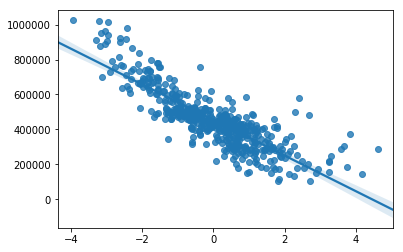

In [40]:
sns.regplot(x=X, y=Y)

#### We can see that a polynomial regression model of degree 2 could be a better fit. Let's test our hypothesis

## Polynomial regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2)

In [43]:
X_d2 = poly.fit_transform(X)

In [44]:
X_d2.shape

(489, 3)

In [45]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_d2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
score = cvs(lin_reg, X_d2, Y, cv=10, scoring='r2')
print('List of r2 score',score)
print()
print('Mean of scores', score.mean())

List of r2 score [ 0.77742559  0.75864718  0.68167371  0.57160459  0.72219045  0.78376299
  0.59666655  0.12048715 -0.68379959  0.36591588]

Mean of scores 0.4694574515006833


#### As we can see, the mean of r2 score obtained from k fold cross validation is much higher in the polynomial regression model : 0.47 vs 0.35

In [47]:
print('intercept:', lr2.intercept_)
print('coef', lr2.coef_)

intercept: 427819.09131957433
coef [      0.         -102702.17172204   14204.44432565]


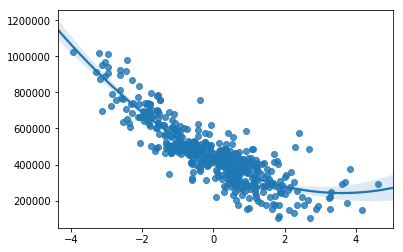

In [48]:
sns.regplot(x=X.flatten(), y=Y,order=2)
plt.show()

# Conclusion

#### Our model can be express as :
\begin{array}
{*{20}c} {\hat{Y} = 427819.09131957433 - 102702.17172204x + 14204.44432565x^2} & {{\rm{with}}} & {x = PCA(RM + LSTAT + PRATIO)}\\ \end{array}


